In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f as f_table
import matplotlib.pyplot as plt

In [6]:
ss = np.array([15,12,14,11])
ii = np.array([39,45,48,60])
ll = np.array([65,45,32,38])

df = pd.DataFrame({
        'ss':ss,
        'ii':ii,
        'll':ll
    })

In [7]:
df

,ii,ll,ss
0,39,65,15
1,45,45,12
2,48,32,14
3,60,38,11


In [18]:
df.describe()

,ii,ll,ss
count,4.000000,4.0000,4.000000
mean,48.000000,45.0000,13.000000
std,8.831761,14.3527,1.825742
min,39.000000,32.0000,11.000000
25%,43.500000,36.5000,11.750000
50%,46.500000,41.5000,13.000000
75%,51.000000,50.0000,14.250000
max,60.000000,65.0000,15.000000


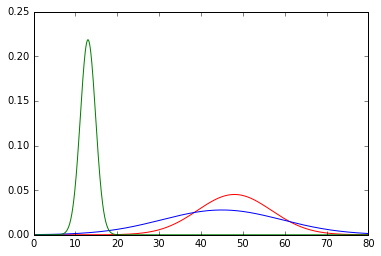

In [15]:
from scipy.stats import norm

%matplotlib inline
x = np.linspace(-0,80,1000)
ii_y = norm.pdf(x, loc=df.ii.mean(), scale=df.ii.std(ddof=1))
ll_y = norm.pdf(x, loc=df.ll.mean(), scale=df.ll.std(ddof=1))
ss_y = norm.pdf(x, loc=df.ss.mean(), scale=df.ss.std(ddof=1))
plt.plot(x,ii_y, 'r',x,ll_y, 'b',x,ss_y, 'g')
plt.show()

In [23]:
import scipy.stats as stats

f = stats.f_oneway(df.ii,df.ll,df.ss)

In [35]:
dfn = 2
dfd = 9
f.statistic # F-value

15.71693735498839

In [51]:
mean, var, skew, kurt = f_table.stats(dfn, dfd, moments='mvsk')
f_critical = f_table.ppf(1-0.05, dfn, dfd)
f_critical

4.2564947290937498

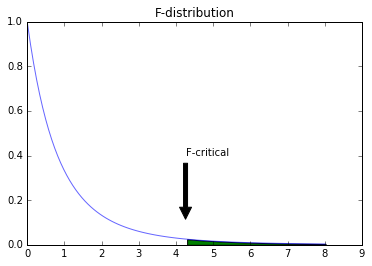

In [62]:
x = np.linspace(f_table.ppf(0.01, dfn, dfd), f_table.ppf(0.99, dfn, dfd), 100)
y = f_table.pdf(x, dfn, dfd)
plt.plot(x, y, '-', lw=1, alpha=0.6, label='f pdf')
plt.fill_between(x, 0, y, where=x >= f_critical, facecolor='green', interpolate=True)
plt.annotate('F-critical ', xy=(f_critical, 0.1), xytext=(f_critical, 0.4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.title("F-distribution")

As F-stats > F-critical, we reject the null hypothesis